# Evaluating Vaccine: A Comparative Analysis of COVID-19 Vaccine

Kasey Nastahunina NetID: knasta3

The project aims to assess the effectiveness and popularity COVID-19 vaccines in different stages in preventing infections, reducing severe cases, and mitigating transmission rates. With the global rollout of multiple vaccines, understanding their relative performance is crucial for optimizing vaccination strategies and addressing potential concerns.This deep analysis will involve the collection and integration of real-world data from diverse sources (e.g CDC, Covid Tracking, HealthCare)nand public health records. The project will employ advanced statistical techniques and machine learning algorithms to evaluate each stages (1st dose, 2nd dose, boosters) of vaccine efficacy across geographic regions.

### Key objectives

1. Exploratory Data Analysis (EDA) - initial data exploration to understand the structure, patterns, and characteristics of the dataset.

2. Visualisations - summary statistics, visualizations, and plots to gain insights.

3. Data Preparation - transform features to create meaningful variables for analysis.

4. Hypothesis - Based on the data analysis of the problem, formulate one or more null hypothesis (H0) and an alternative hypothesis (H1)..

5. Machine Learning Analysis - Choose appropriate machine learning or statistical models based on the project's goal. Split the data into training, validation, and test sets for model development and evaluation. Train and fine-tune the models using appropriate techniques (e.g., cross-validation, hyperparameter tuning).

6. Evaluation and Validation - assess model performance using relevant metrics (e.g., accuracy, precision, recall, F1-score for classification; RMSE, MAE for regression).

7. Interpretation - interpret model results and provide meaningful insights. Create visualizations, reports, and dashboards to report findings.

8. Conclusion and Final Report - Summarize the findings, conclusions, and actionable recommendations. Present the project's achievements and potential next steps.



### Changes Made

Initially the idea of the project was Effectiveness of Non-Pharmaceutical Interventions to see how masks, social distancing, quarantining, ect helped prevent COVID-19 spread. However, with limited data available on Non-Pharmaceutical Interventions (NPIs) we have decided to shift their focus towards assessing the Effectiveness of COVID-19 vaccines. There is more variety of data that would be interesting to analyze. 

This project could help develop new hypotheses and strategies for controlling the spread of infectious diseases in the future. With a wider range of data available, we can understand various aspects of vaccination efforts. This could include studying the efficacy of different vaccine types, analyzing the impact of vaccination on different demographics, and evaluating the long-term effectiveness of booster shots.

Ultimately, the effectiveness of COVID-19 vaccines is a critical aspect to combat the pandemic that has influenced numerous lives and is still affecting our society after multiple years. By deeply studying and analyzing this topic, we can contribute to the global understanding of vaccination as a powerful tool in controlling infectious diseases and get an understanding for more effective strategies in the future.


## Part 1: Data Preperation

There are two different data sets both found on World Health Organization (WHO) webpage. The first set is used to track the Covid-19 cases, deaths, etc, and the second set is developed information on Covid-19 and Vaccine different records. 

Here is how both data sets look like:

In [76]:
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import random

In [16]:
covidData = pd.read_csv("WHO-COVID-19-global-data.csv", dtype={'sched_dep_time': 'f8', 'sched_arr_time': 'f8'})
covidData.tail(5)
#Kasey

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
331795,2023-10-29,ZW,Zimbabwe,AFRO,0,265821,0,5720
331796,2023-10-30,ZW,Zimbabwe,AFRO,0,265821,0,5720
331797,2023-10-31,ZW,Zimbabwe,AFRO,0,265821,0,5720
331798,2023-11-01,ZW,Zimbabwe,AFRO,0,265821,0,5720
331799,2023-11-02,ZW,Zimbabwe,AFRO,0,265821,0,5720


In [13]:
covidData.describe()
#Kasey

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,3.318000e+05,3.318000e+05,331800.000000,3.318000e+05
mean,2.325737e+03,1.518453e+06,21.027797,1.834586e+04
std,3.870292e+04,6.883106e+06,147.262467,7.655302e+04
min,-6.507900e+04,0.000000e+00,-3520.000000,0.000000e+00
25%,0.000000e+00,2.664750e+03,0.000000,2.100000e+01
50%,0.000000e+00,3.750300e+04,0.000000,4.090000e+02
75%,1.460000e+02,4.399002e+05,1.000000,5.874250e+03
max,6.966046e+06,1.034368e+08,11447.000000,1.138309e+06


In [14]:
vaccineData = pd.read_csv("vaccination-data.csv", dtype={'sched_dep_time': 'f8', 'sched_arr_time': 'f8'})
vaccineData.head(5)
#Kasey

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_LAST_DOSE,PERSONS_LAST_DOSE_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,American Samoa,ASM,WPRO,REPORTING,2023-03-29,114706.0,46206,207.812,83.711,42479,76.959,NaN,2020-12-21,3.0,24160.0,43.770
1,Austria,AUT,EURO,REPORTING,2023-07-02,20403676.0,6899873,229.200,76.953,6682372,74.423,NaN,2020-12-30,10.0,5405966.0,60.207
2,Bangladesh,BGD,SEARO,REPORTING,2023-10-18,362229859.0,151504394,219.947,91.994,142193276,86.340,NaN,2021-01-27,8.0,68532189.0,41.613
3,Brunei Darussalam,BRN,WPRO,REPORTING,2023-06-30,1293100.0,451149,295.580,103.125,446714,102.111,NaN,2021-04-03,5.0,340466.0,77.825
4,Bulgaria,BGR,EURO,REPORTING,2023-09-24,4618931.0,2108544,66.400,30.831,2080324,30.419,NaN,2020-12-30,4.0,833135.0,12.182


In [15]:
vaccineData.describe()
#Kasey

,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_LAST_DOSE,PERSONS_LAST_DOSE_PER100,VACCINES_USED,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
count,2.280000e+02,2.290000e+02,224.000000,229.000000,2.290000e+02,229.000000,0.0,225.000000,2.130000e+02,213.000000
mean,5.936173e+07,2.444442e+07,157.525549,64.021520,2.252511e+07,59.055817,NaN,5.004444,1.167633e+07,32.384286
std,2.839923e+08,1.138834e+08,84.384285,25.279778,1.084298e+08,25.316711,NaN,2.925409,6.096485e+07,25.255548
min,1.170000e+02,0.000000e+00,0.348000,0.000000,0.000000e+00,0.000000,NaN,1.000000,0.000000e+00,0.000000
25%,4.736552e+05,1.923710e+05,87.040000,45.654000,1.848010e+05,39.850000,NaN,3.000000,4.599500e+04,8.574000
50%,4.749752e+06,2.740227e+06,161.055500,68.860000,2.484985e+06,63.703000,NaN,5.000000,6.465040e+05,30.681000
75%,2.336545e+07,1.088471e+07,223.542500,82.616000,9.574047e+06,78.354000,NaN,7.000000,4.474108e+06,53.030000
max,3.516881e+09,1.318027e+09,469.778000,163.185000,1.284480e+09,163.185000,NaN,12.000000,8.340601e+08,145.944000


## Part 2: Visualizations

3 Comparisons:

1. Start of Covid-19 (March - April - May 2020, US) no vaccinations. Comparison of death and total cases.
2. Peak of Covid-19 (December - January - February 2020-2021, US) vaccination started December of 2020. Comparison of death and total cases and vaccination.
3. Recent dates (July - August - September 2022, US), majority is vaccinated with all doses. Comparison of death and total cases and vaccination.
4. Overall raise of death from covid and vaccinations

Build Hypothesis based on the visualizations.


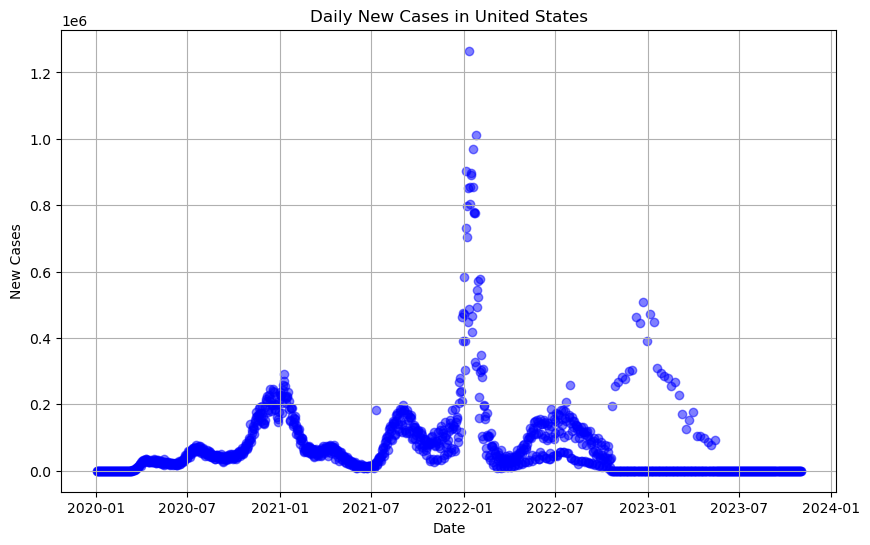

In [74]:
covidData['Date_reported'] = pd.to_datetime(covidData['Date_reported'])

us_data = covidData[covidData['Country'] == 'United States of America'].copy()

plt.figure(figsize=(10, 6))
plt.scatter(us_data['Date_reported'], us_data['New_cases'], color='blue', marker='o', alpha=0.5)
plt.title('Daily New Cases in United States')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.grid(True)
plt.show()
#Kasey

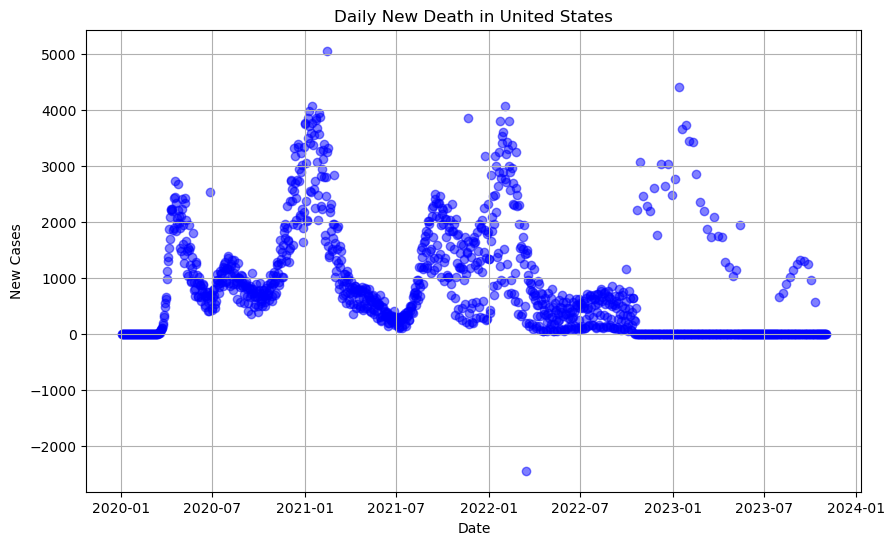

In [45]:
covidData['Date_reported'] = pd.to_datetime(covidData['Date_reported'])

us_data = covidData[covidData['Country'] == 'United States of America'].copy()

plt.figure(figsize=(10, 6))
plt.scatter(us_data['Date_reported'], us_data['New_deaths'], color='blue', marker='o', alpha=0.5)
plt.title('Daily New Death in United States')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.grid(True)
plt.show()
#Kasey

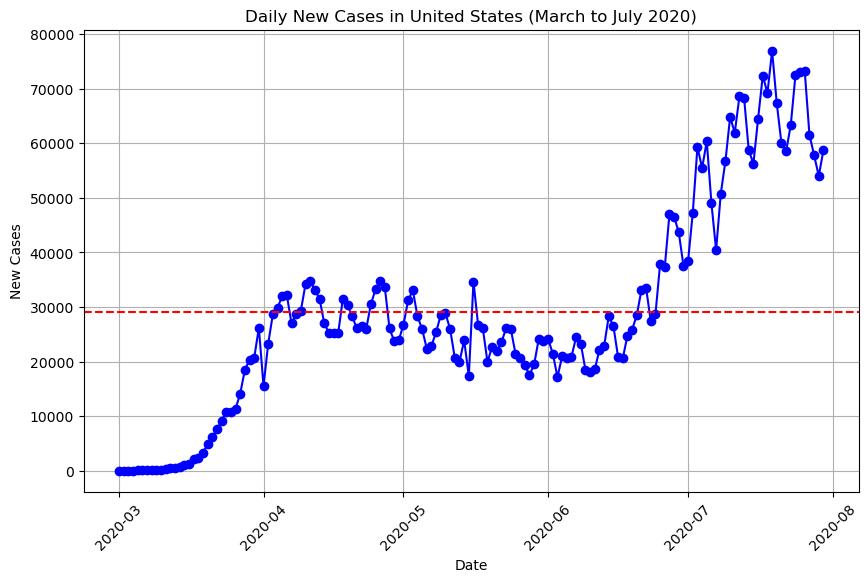

In [60]:
covidData['Date_reported'] = pd.to_datetime(covidData['Date_reported'])

us_data = covidData[covidData['Country'] == 'United States of America'].copy()

start_date = '2020-03-01'
end_date = '2020-07-30'
us_data = us_data[(us_data['Date_reported'] >= start_date) & (us_data['Date_reported'] <= end_date)]

us_data['Daily_new_cases'] = us_data['New_cases']
average_new_cases = us_data['Daily_new_cases'].mean()

plt.figure(figsize=(10, 6))
plt.plot(us_data['Date_reported'], us_data['Daily_new_cases'], color='blue', marker='o', linestyle='-')
plt.axhline(y=average_new_cases, color='red', linestyle='--', label='Average')
plt.title('Daily New Cases in United States (March to July 2020)')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
#Kasey

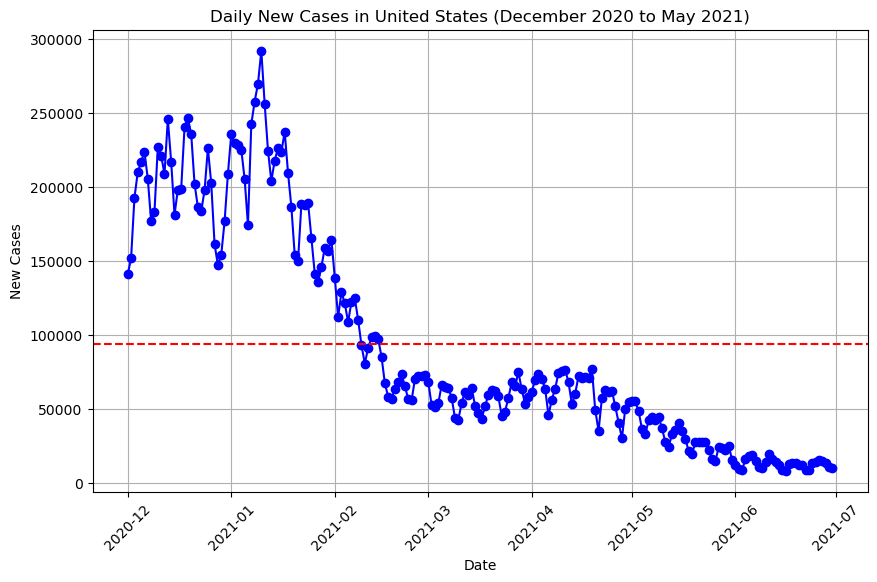

In [62]:
covidData['Date_reported'] = pd.to_datetime(covidData['Date_reported'])

us_data = covidData[covidData['Country'] == 'United States of America'].copy()

start_date = '2020-12-01'
end_date = '2021-06-30'
us_data = us_data[(us_data['Date_reported'] >= start_date) & (us_data['Date_reported'] <= end_date)]

us_data['Daily_new_cases'] = us_data['New_cases']
average_new_cases = us_data['Daily_new_cases'].mean()

plt.figure(figsize=(10, 6))
plt.plot(us_data['Date_reported'], us_data['Daily_new_cases'], color='blue', marker='o', linestyle='-')
plt.axhline(y=average_new_cases, color='red', linestyle='--', label='Average')
plt.title('Daily New Cases in United States (December 2020 to May 2021)')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
#Kasey

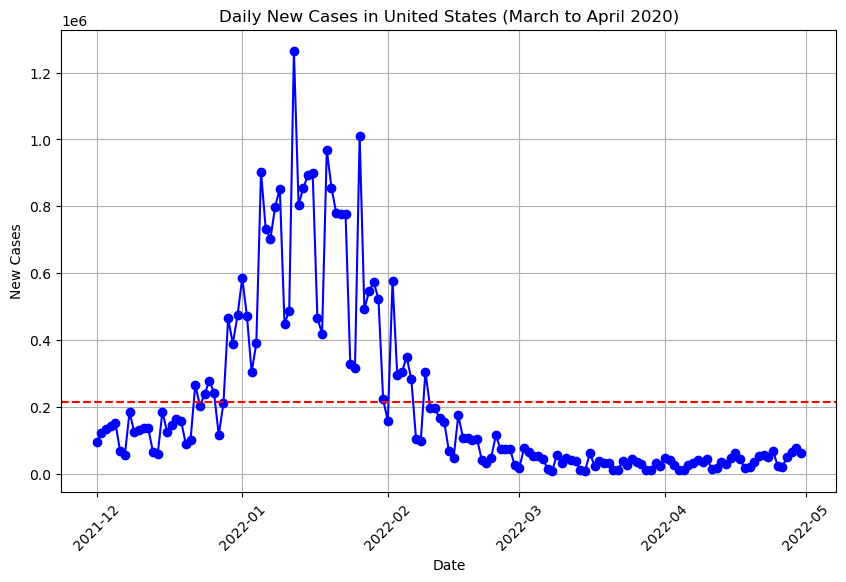

In [63]:
covidData['Date_reported'] = pd.to_datetime(covidData['Date_reported'])

# Filter for United States and create a copy
us_data = covidData[covidData['Country'] == 'United States of America'].copy()

# Filter data for March and April 2020
start_date = '2021-12-01'
end_date = '2022-04-30'
us_data = us_data[(us_data['Date_reported'] >= start_date) & (us_data['Date_reported'] <= end_date)]

# Calculate daily new cases
us_data['Daily_new_cases'] = us_data['New_cases']
average_new_cases = us_data['Daily_new_cases'].mean()

# Creating the line plot
plt.figure(figsize=(10, 6))
plt.plot(us_data['Date_reported'], us_data['Daily_new_cases'], color='blue', marker='o', linestyle='-')
plt.axhline(y=average_new_cases, color='red', linestyle='--', label='Average')
plt.title('Daily New Cases in United States (March to April 2020)')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
#Kasey

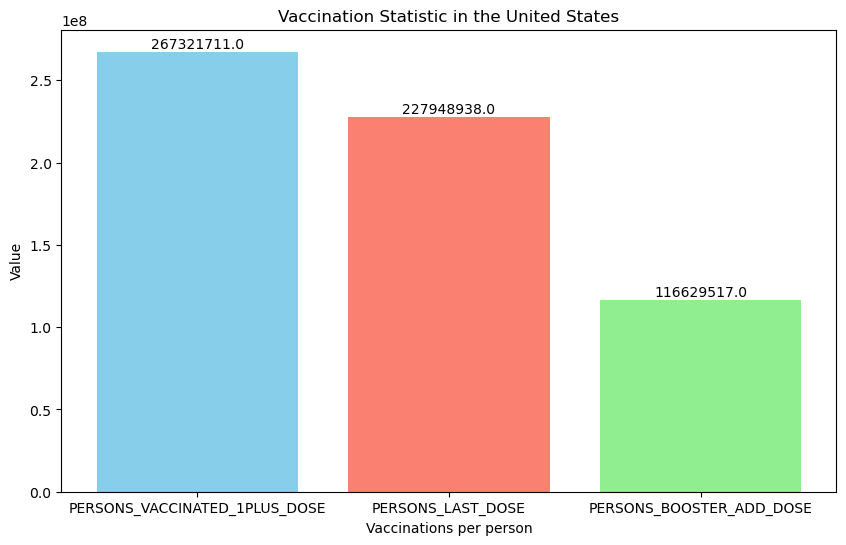

In [72]:
df_us = vaccineData[vaccineData['COUNTRY'] == 'United States of America']
columns_of_interest = ['PERSONS_VACCINATED_1PLUS_DOSE', 'PERSONS_LAST_DOSE', 'PERSONS_BOOSTER_ADD_DOSE']

df_selected = df_us[columns_of_interest]
values = df_selected.iloc[0].values
plt.figure(figsize=(10, 6))
bars = plt.bar(columns_of_interest, values, color=['skyblue', 'salmon', 'lightgreen'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom', color='black', fontsize=10)

plt.title('Vaccination Statistic in the United States')
plt.xlabel('Vaccinations per person')
plt.ylabel('Value')

plt.show()
#Kasey

## Part 3: Machine Learning Analysis


Some ideas for Machine Learning Analysis:
1. Geospatial Analysis. Use the Country_code and Country information to perform geospatial analysis. Analyze the spread patterns across different countries, identify hotspots, and analyze regional variations in cases and deaths.
2. Anomaly Detection. Analyze unusual spikes or drops in cases or deaths that might indicate data quality issues or significant events
3. Feature Importance Analysis. Determine which factors (e.g., region, demographics, economics) contribute most to the spread or severity of COVID-19 cases.
4. Cluster countries or regions based on features like New_cases, Cumulative_cases, or New_deaths to identify groups with similar COVID-19 dynamics.
5. Vaccination Effectiveness. Use features like TOTAL_VACCINATIONS, PERSONS_VACCINATED_1PLUS_DOSE_PER100, and PERSONS_LAST_DOSE_PER100 to analyze the effectiveness of vaccination.
6. Vaccination Rate Comparison. Compare vaccination rates (TOTAL_VACCINATIONS_PER100) between different countries and regions to identify disparities and potential areas for improvement.
7. Cluster countries or regions based on vaccination metrics to identify groups with similar vaccination dynamics.
8. Covid 19 prediction.

### 3. Feature Importance Analysis. (Kasey)
Determine which factors (e.g., region, demographics, economics) contribute most to the spread or severity of COVID-19 cases.

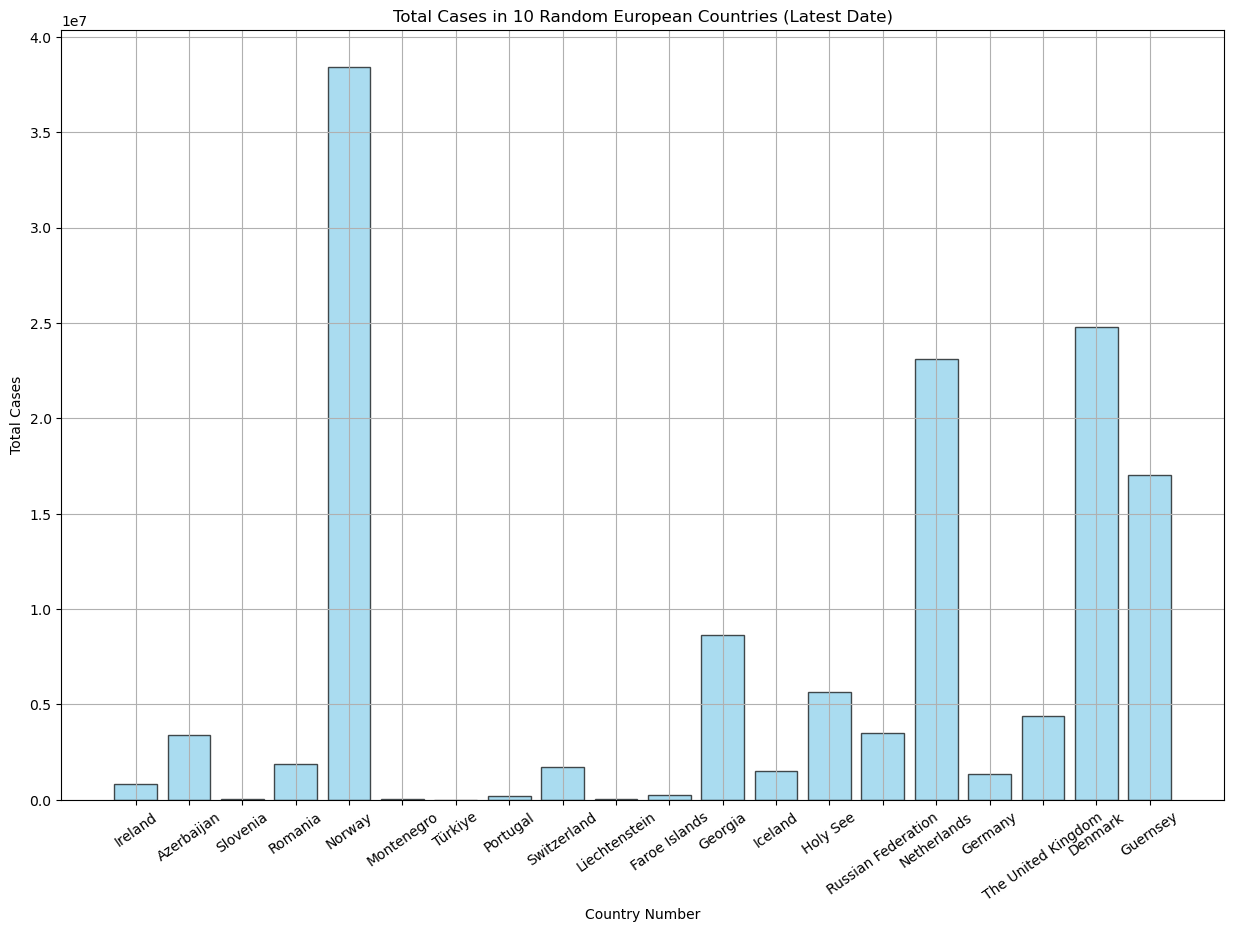

In [106]:
european_data = covidData[covidData['WHO_region'] == 'EURO']

# Find the row with the latest date
latest_date_row = european_data[european_data['Date_reported'] == european_data['Date_reported'].max()]

# Get 10 random European countries
random_countries = random.sample(list(latest_date_row['Country']), 20)

# Get the total cases for these 10 countries on the latest date
total_cases = latest_date_row[latest_date_row['Country'].isin(random_countries)]['Cumulative_cases']

# Create a list of numbers to represent the countries
country_numbers = list(range(1, 21))

# Creating the histogram
plt.figure(figsize=(15, 10))
plt.bar(country_numbers, total_cases, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Total Cases in 10 Random European Countries (Latest Date)')
plt.xlabel('Country Number')
plt.ylabel('Total Cases')
plt.xticks(country_numbers, random_countries, rotation=35)
plt.grid(True)
plt.show()

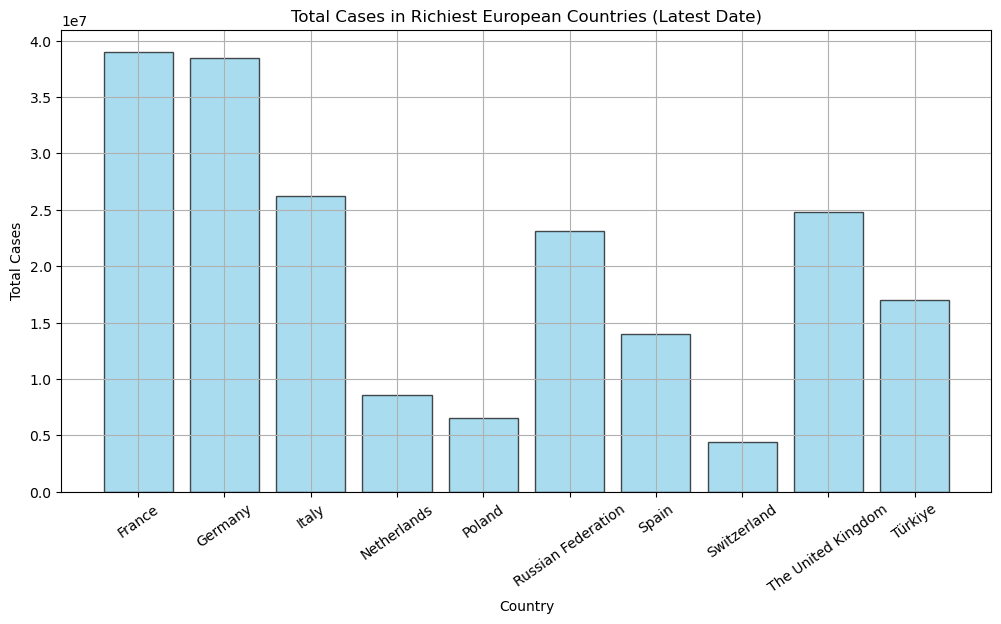

In [107]:
countries_of_interest = ['Germany', 'The United Kingdom', 'France', 'Italy', 'Russian Federation', 'Spain', 'Netherlands', 'Switzerland', 'Türkiye', 'Poland']

# Filter data for selected countries and the latest date
latest_date_data = covidData[covidData['Date_reported'] == covidData['Date_reported'].max()]
selected_countries_data = latest_date_data[latest_date_data['Country'].isin(countries_of_interest)]

# Get the total cases for the selected countries on the latest date
total_cases = selected_countries_data.set_index('Country')['Cumulative_cases']

# Creating the histogram
plt.figure(figsize=(12, 6))
plt.bar(total_cases.index, total_cases, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Total Cases in Richiest European Countries (Latest Date)')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation=35)
plt.grid(True)
plt.show()

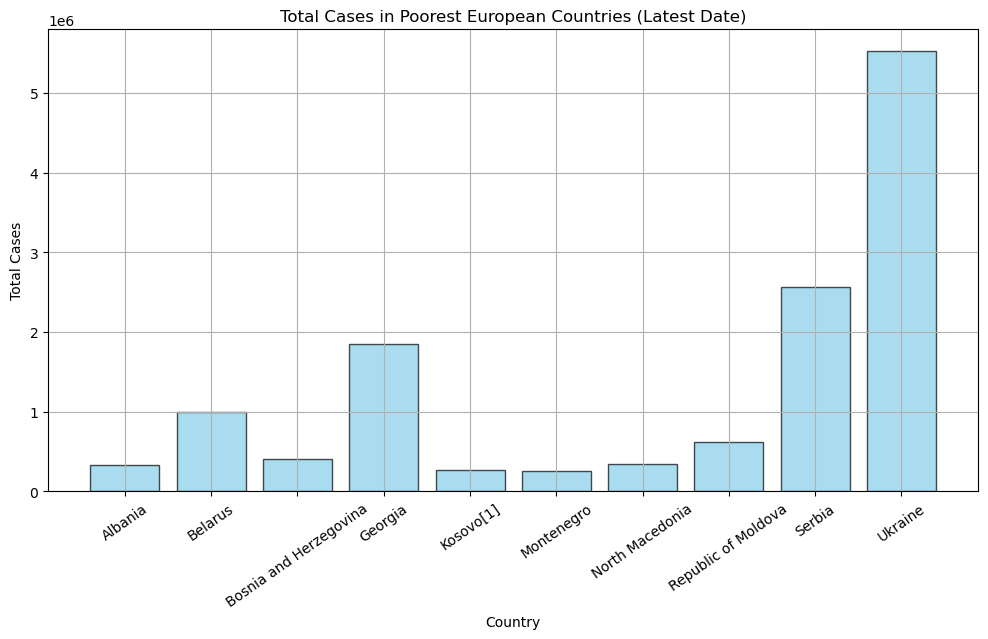

In [108]:
countries_of_interest = ['Ukraine', 'Georgia', 'Kosovo[1]', 'Republic of Moldova', 'Albania', 'Serbia', 'North Macedonia', 'Bosnia and Herzegovina', 'Belarus', 'Montenegro']

# Filter data for selected countries and the latest date
latest_date_data = covidData[covidData['Date_reported'] == covidData['Date_reported'].max()]
selected_countries_data = latest_date_data[latest_date_data['Country'].isin(countries_of_interest)]

# Get the total cases for the selected countries on the latest date
total_cases = selected_countries_data.set_index('Country')['Cumulative_cases']

# Creating the histogram
plt.figure(figsize=(12, 6))
plt.bar(total_cases.index, total_cases, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Total Cases in Poorest European Countries (Latest Date)')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation=35)
plt.grid(True)
plt.show()

## Part 4: Reflection

○ What is the most challenging part of the project that you’ve encountered so far?

○ What are your initial insights?

○ Are there any concrete results you can show at this point? If not, why not?

○ Going forward, what are the current biggest problems you’re facing?

○ Do you think you are on track with your project? If not, what parts do you need to
dedicate more time to?

○ Given your initial exploration of the data, is it worth proceeding with your project,
why? If not, how will you move forward (method, data etc)?


## Part 5: Next Steps

Concrete plans and goals for the next month